# Correcting SCSS for S$^{6+}$ and SCAS for S$^{2-}$
- in reality, many magmas contain both S$^{6+}$ and S$^{2-}$ species
- This means we have to correct the SCSS and SCAS to get the Total dissolved S content before saturation in a S-phase, to compare to say melt inclusion measurements
- This notebook shows first how to visualize the transition using Jugo, and then how to perform the correction for a calculated SCSS
- Download Petrolog data from: https://github.com/PennyWieser/PySulfSat/blob/main/docs/Examples/S6_S2_Corrections/PetrologCalculations.xlsx

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PySulfSat as ss
import Thermobar as pt
pd.options.display.max_columns = None

## Visualization
First, lets visualize for a linspace of delta QFM values, how different parameters change, using the S6/St ratios from Jugo et al. (2010)

In [2]:
SCSS=1000
SCAS=5000
DeltaQFM_lin=np.linspace(-1, 3, 10001)
QFM_point1=DeltaQFM_lin==-1
QFM_point2=DeltaQFM_lin==1
QFM_point4=DeltaQFM_lin==2


df_Species=ss.calculate_S_Total_SCSS_SCAS(deltaQFM=DeltaQFM_lin,
            SCSS=SCSS, SCAS=SCAS, model='Jugo')

df_Species.head()

,Total_S,S2_Tot,S6_Tot,deltaQFM,S6St_Liq,SCSS_2,SCAS_6_ppm,SCSS_Tot,SCAS_Tot,S6 in SCSS_Tot,S2 in SCAS_Tot
0,1000.079433,1000.0,0.079433,-1.0000,0.000079,1000,5000,1000.079433,6.295127e+07,0.079433,6.294627e+07
1,1000.079579,1000.0,0.079579,-0.9996,0.000080,1000,5000,1000.079579,6.283543e+07,0.079579,6.283043e+07
2,1000.079726,1000.0,0.079726,-0.9992,0.000080,1000,5000,1000.079726,6.271979e+07,0.079726,6.271479e+07
3,1000.079873,1000.0,0.079873,-0.9988,0.000080,1000,5000,1000.079873,6.260438e+07,0.079873,6.259938e+07
4,1000.080020,1000.0,0.080020,-0.9984,0.000080,1000,5000,1000.080020,6.248917e+07,0.080020,6.248417e+07


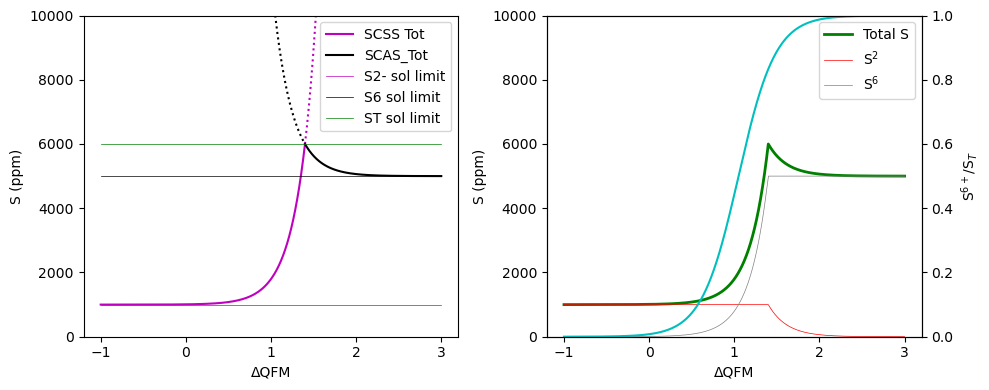

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
SCSS_Tot_excessS6=df_Species['S6 in SCSS_Tot']>df_Species['SCAS_6_ppm']

ax1.plot(df_Species['deltaQFM'].loc[~SCSS_Tot_excessS6], 
         df_Species['SCSS_Tot'].loc[~SCSS_Tot_excessS6], '-m', label='SCSS Tot')

ax1.plot(df_Species['deltaQFM'].loc[SCSS_Tot_excessS6], 
         df_Species['SCSS_Tot'].loc[SCSS_Tot_excessS6], ':m')

SCAS_Tot_excessS2=df_Species['S2 in SCAS_Tot']>df_Species['SCSS_2']

ax1.plot(df_Species['deltaQFM'].loc[~SCAS_Tot_excessS2], 
         df_Species['SCAS_Tot'].loc[~SCAS_Tot_excessS2], '-k', label='SCAS_Tot')
ax1.plot(df_Species['deltaQFM'].loc[SCAS_Tot_excessS2], 
         df_Species['SCAS_Tot'].loc[SCAS_Tot_excessS2], ':k')

ax1.plot([-1, 3], [SCSS, SCSS], '-m', lw=0.5, label='S2- sol limit')
ax1.plot([-1, 3], [SCAS, SCAS], '-k', lw=0.5, label='S6 sol limit')
ax1.plot([-1, 3], [SCAS+SCSS, SCAS+SCSS], '-g', lw=0.5, label='ST sol limit')
ax1.legend()
#ax1.legend()

maxS=SCSS+SCAS
maxX=df_Species['deltaQFM'].loc[df_Species['Total_S']==maxS]
ax2.plot(df_Species['deltaQFM'], df_Species['Total_S'], '-g', lw=2, label='Total S')

ax2.yaxis.set_tick_params(which='both', labelbottom=True)
ax2b=ax2.twinx()
ax2.plot(df_Species['deltaQFM'], df_Species['S2_Tot'], '-r', lw=0.5, label='S$^{2}$')
ax2.plot(df_Species['deltaQFM'], df_Species['S6_Tot'], '-', color='grey', lw=0.5, label='S$^{6}$')

ax2b.plot(df_Species['deltaQFM'], df_Species['S6St_Liq'], '-c', label='S$^{6}$/$_{T}$')
ax2.legend()
ax2b.plot([maxX, maxX], [0, 1], ':c')
ax1.set_ylim([0, 10000])
ax2.set_ylim([0, 10000])
ax2b.set_ylim([0, 1])
ax1.set_ylabel('S (ppm)')
ax2.set_ylabel('S (ppm)')
ax1.set_xlabel('ΔQFM')
ax2.set_xlabel('ΔQFM')
ax2b.set_ylabel('S$^{6+}$/S$_{T}$')
fig.tight_layout()
fig.savefig('SCSS_SCAS.png', dpi=300)

## Now lets apply it to some Petrolog fractionation path

In [4]:
df_out=ss.import_data('PetrologCalculations.xlsx', Petrolog=True)
df_out.head()

We have replaced all missing liquid oxides and strings with zeros. 


,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,Ni_Liq_ppm,Cu_Liq_ppm,SiO2_magma,TiO2_magma,Al2O3_magma,Fe2O3_magma,FeO_magma,MnO_magma,MgO_magma,CaO_magma,Na2O_magma,K2O_magma,P2O5_magma,Cr2O3_magma,Ni_magma,Cu_magma,Cr2O3_Liq,Ni_Liq,Cu_Liq,SiO2_cumulate,TiO2_cumulate,Al2O3_cumulate,Fe2O3_cumulate,FeO_cumulate,MnO_cumulate,MgO_cumulate,CaO_cumulate,Na2O_cumulate,K2O_cumulate,P2O5_cumulate,Cr2O3_cumulate,Ni_cumulate,Cu_cumulate,Temperature,Temperature_Olv,Olv_Fo_magma,Olv_Kd,Olv_Fo_cumulate,Pressure(kbar),Lg(fO2),dNNO,density,Ln(viscosity),Melt_%_magma,Olv_%_magma,Olv_Peritectic,Fluid_%_magma,Olv_%_cumulate,Sample,Unnamed:58,T_K,P_kbar,Fraction_melt,Sample_ID_Liq
0,49.9010,0.9981,14.9715,8.980926,0.0998,9.9763,11.9772,2.4953,0.1996,0.0998,0.0,0.098489,697.8,99.8,49.9010,0.9981,14.9715,0.9839,8.0964,0.0998,9.9763,11.9772,2.4953,0.1996,0.0998,0.0998,697.8,99.8,0.0998,697.8,99.8,40.2986,0,0,0,11.7372,0,46.9121,0,0,0,0,0,8257.6,10.0,1253.281,1253.281,87.69,0.308,87.69,1,-7.72,-0.7,2.683,6.25,99.9900,0,N,0,0.0100,PetrologDefault,08:21:15,1526.431,1,0.999900,0
1,49.9978,1.0081,15.1220,8.951296,0.1008,9.6064,12.0976,2.5203,0.2016,0.1008,0.0,0.097851,624.6,100.7,49.9978,1.0081,15.1220,0.9743,8.0754,0.1008,9.6064,12.0976,2.5203,0.2016,0.1008,0.1008,624.6,100.7,0.1008,624.6,100.7,40.2698,0,0,0,11.9273,0,46.7855,0,0,0,0,0,7984.5,10.0,1243.430,1243.430,87.28,0.309,87.49,1,-7.83,-0.7,2.682,6.38,98.9950,0,N,0,1.0050,PetrologDefault,08:21:15,1516.580,1,0.989950,1
2,50.0982,1.0185,15.2770,8.916645,0.1018,9.2279,12.2216,2.5462,0.2037,0.1018,0.0,0.097284,554.8,101.6,50.0982,1.0185,15.2770,0.9649,8.0492,0.1018,9.2279,12.2216,2.5462,0.2037,0.1018,0.1018,554.8,101.6,0.1018,554.8,101.6,40.2390,0,0,0,12.1280,0,46.6507,0,0,0,0,0,7708.8,10.1,1233.064,1233.064,86.83,0.310,87.27,1,-7.94,-0.7,2.681,6.52,97.9904,0,N,0,2.0096,PetrologDefault,08:21:15,1506.214,1,0.979904,2
3,50.2003,1.0289,15.4337,8.877334,0.1029,8.8486,12.3469,2.5723,0.2058,0.1029,0.0,0.096823,489.9,102.6,50.2003,1.0289,15.4337,0.9561,8.0178,0.1029,8.8486,12.3469,2.5723,0.2058,0.1029,0.1029,489.9,102.6,0.1029,489.9,102.6,40.2069,0,0,0,12.3359,0,46.5096,0,0,0,0,0,7436.5,10.1,1222.361,1222.361,86.36,0.311,87.05,1,-8.05,-0.7,2.680,6.67,96.9959,0,N,0,3.0041,PetrologDefault,08:21:15,1495.511,1,0.969959,3
4,50.3062,1.0397,15.5950,8.832002,0.1040,8.4612,12.4760,2.5992,0.2079,0.1040,0.0,0.096445,428.7,103.5,50.3062,1.0397,15.5950,0.9475,7.9802,0.1040,8.4612,12.4760,2.5992,0.2079,0.1040,0.1040,428.7,103.5,0.1040,428.7,103.5,40.1725,0,0,0,12.5558,0,46.3589,0,0,0,0,0,7162.8,10.2,1211.080,1211.080,85.84,0.312,86.81,1,-8.18,-0.7,2.679,6.83,95.9923,0,N,0,4.0077,PetrologDefault,08:21:15,1484.230,1,0.959923,4


## Calculate Smythe SCSS with a fixed sulfide composition

In [5]:
Smythe_FixedSulf=ss.calculate_S2017_SCSS(df=df_out,
T_K=df_out['T_K'], P_kbar=df_out['P_kbar'], 
Fe3Fet_Liq=df_out['Fe3Fet_Liq'],
Fe_FeNiCu_Sulf=0.65)
Smythe_FixedSulf.head()

Using inputted Fe_FeNiCu_Sulf ratio for calculations.
no non ideal SCSS as no Cu/CuFeNiCu


,SCSS2_ppm_ideal_Smythe2017,SCSS2_ppm_ideal_Smythe2017_1sigma,T_Input_K,P_Input_kbar,Fe_FeNiCu_Sulf,Fe3Fet_Liq_input,Si_wt_atom,Ti_wt_atom,Al_wt_atom,Mg_wt_atom,Mn_wt_atom,Fe2_wt_atom,Fe3_wt_atom,Ca_wt_atom,Na_wt_atom,K_wt_atom,P_wt_atom,H_wt_atom,Si_XA_ideal,Ti_XA_ideal,Al_XA_ideal,Mg_XA_ideal,Fe2_XA_ideal,Ca_XA_ideal,Na_XA_ideal,K_XA_ideal,H_XA_ideal,Si*Fe_ideal,Si_XA_non_ideal,Ti_XA_non_ideal,Al_XA_non_ideal,Mg_XA_non_ideal,Fe2_XA_non_ideal,Ca_XA_non_ideal,Na_XA_non_ideal,K_XA_non_ideal,H_XA_non_ideal,Si*Fe_non_ideal,log_SCSS_ideal,Fe_FeNiCu_Sulf_calc,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,Ni_Liq_ppm,Cu_Liq_ppm,SiO2_magma,TiO2_magma,Al2O3_magma,Fe2O3_magma,FeO_magma,MnO_magma,MgO_magma,CaO_magma,Na2O_magma,K2O_magma,P2O5_magma,Cr2O3_magma,Ni_magma,Cu_magma,Cr2O3_Liq,Ni_Liq,Cu_Liq,SiO2_cumulate,TiO2_cumulate,Al2O3_cumulate,Fe2O3_cumulate,FeO_cumulate,MnO_cumulate,MgO_cumulate,CaO_cumulate,Na2O_cumulate,K2O_cumulate,P2O5_cumulate,Cr2O3_cumulate,Ni_cumulate,Cu_cumulate,Temperature,Temperature_Olv,Olv_Fo_magma,Olv_Kd,Olv_Fo_cumulate,Pressure(kbar),Lg(fO2),dNNO,density,Ln(viscosity),Melt_%_magma,Olv_%_magma,Olv_Peritectic,Fluid_%_magma,Olv_%_cumulate,Sample,Unnamed:58,T_K,P_kbar,Fraction_melt,Sample_ID_Liq,Fe_FeNiCu_Sulf_calc
0,1163.632126,317.869126,1526.431,1,0.65,0.098489,0.458760,0.006900,0.162217,0.136728,0.000777,0.062247,0.006799,0.117975,0.044478,0.002341,0.000777,0.0,-12643.917846,-77.425761,-2992.954217,-1910.042747,-2133.469827,-923.846254,-589.186980,-67.922629,-0.0,3328.767457,-12843.656196,-73.937634,-3082.117373,-1984.261077,-2172.132780,-1041.911444,-609.912056,-66.914620,-0.0,3364.402871,7.059302,0.65,49.9010,0.9981,14.9715,8.980926,0.0998,9.9763,11.9772,2.4953,0.1996,0.0998,0.0,0.098489,697.8,99.8,49.9010,0.9981,14.9715,0.9839,8.0964,0.0998,9.9763,11.9772,2.4953,0.1996,0.0998,0.0998,697.8,99.8,0.0998,697.8,99.8,40.2986,0,0,0,11.7372,0,46.9121,0,0,0,0,0,8257.6,10.0,1253.281,1253.281,87.69,0.308,87.69,1,-7.72,-0.7,2.683,6.25,99.9900,0,N,0,0.0100,PetrologDefault,08:21:15,1526.431,1,0.999900,0,0.65
1,1132.187652,309.279446,1516.580,1,0.65,0.097851,0.460128,0.006977,0.164018,0.131795,0.000786,0.062150,0.006740,0.119285,0.044970,0.002367,0.000785,0.0,-12681.596545,-78.282676,-3026.179002,-1841.131776,-2130.145227,-934.101871,-595.707729,-68.674435,-0.0,3333.484439,-12881.930112,-74.755944,-3116.331958,-1912.672440,-2168.747932,-1053.477703,-616.662177,-67.655269,-0.0,3369.170350,7.031907,0.65,49.9978,1.0081,15.1220,8.951296,0.1008,9.6064,12.0976,2.5203,0.2016,0.1008,0.0,0.097851,624.6,100.7,49.9978,1.0081,15.1220,0.9743,8.0754,0.1008,9.6064,12.0976,2.5203,0.2016,0.1008,0.1008,624.6,100.7,0.1008,624.6,100.7,40.2698,0,0,0,11.9273,0,46.7855,0,0,0,0,0,7984.5,10.0,1243.430,1243.430,87.28,0.309,87.49,1,-7.83,-0.7,2.682,6.38,98.9950,0,N,0,1.0050,PetrologDefault,08:21:15,1516.580,1,0.989950,1,0.65
2,1099.523987,300.356720,1506.214,1,0.65,0.097284,0.461540,0.007056,0.165875,0.126736,0.000794,0.062014,0.006682,0.120635,0.045480,0.002394,0.000794,0.0,-12720.511949,-79.173986,-3060.433090,-1770.461624,-2125.481450,-944.675207,-602.466551,-69.463239,-0.0,3336.392958,-12921.460271,-75.607099,-3151.606511,-1839.256265,-2163.999637,-1065.402284,-623.658745,-68.432367,-0.0,3372.110005,7.002633,0.65,50.0982,1.0185,15.2770,8.916645,0.1018,9.2279,12.2216,2.5462,0.2037,0.1018,0.0,0.097284,554.8,101.6,50.0982,1.0185,15.2770,0.9649,8.0492,0.1018,9.2279,12.2216,2.5462,0.2037,0.1018,0.1018,554.8,101.6,0.1018,554.8,101.6,40.2390,0,0,0,12.1280,0,46.6507,0,0,0,0,0,7708.8,10.1,1233.064,1233.064,86.83,0.310,87.27,1,-7.94,-0.7,2.681,6.52,97.9904,0,N,0,2.0096,PetrologDefault,08:21:15,1506.214,1,0.979904,2,0.65
3,1066.279038,291.275205,1495.511,1,0.65,0.096823,0.462968,0.007136,0.167753,0.121655,0.000804,0.061837,0.006628,0.122000,0.045995,0.002421,0.000803,0.0,-12759.875643,-80.066770,-3095.084610,-1699.479235,-2119.422207,-955.366577,-609.283904,-70.253349,-0.0,3337.176747,-12961.4

## Calculate SCAS using ZT2022

In [6]:
ZT22_SCAS=ss.calculate_ZT2022_SCAS(df=df_out, T_K=df_out['T_K'])
ZT22_SCAS.head()

,SCAS6_ppm,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,Ni_Liq_ppm,Cu_Liq_ppm,SiO2_magma,TiO2_magma,Al2O3_magma,Fe2O3_magma,FeO_magma,MnO_magma,MgO_magma,CaO_magma,Na2O_magma,K2O_magma,P2O5_magma,Cr2O3_magma,Ni_magma,Cu_magma,Cr2O3_Liq,Ni_Liq,Cu_Liq,SiO2_cumulate,TiO2_cumulate,Al2O3_cumulate,Fe2O3_cumulate,FeO_cumulate,MnO_cumulate,MgO_cumulate,CaO_cumulate,Na2O_cumulate,K2O_cumulate,P2O5_cumulate,Cr2O3_cumulate,Ni_cumulate,Cu_cumulate,Temperature,Temperature_Olv,Olv_Fo_magma,Olv_Kd,Olv_Fo_cumulate,Pressure(kbar),Lg(fO2),dNNO,density,Ln(viscosity),Melt_%_magma,Olv_%_magma,Olv_Peritectic,Fluid_%_magma,Olv_%_cumulate,Sample,Unnamed:58,T_K,P_kbar,Fraction_melt,Sample_ID_Liq
0,8800.801280,49.9010,0.9981,14.9715,8.980926,0,9.9763,11.9772,2.4953,0.1996,0.0998,0.0,0.098489,697.8,99.8,49.9010,0.9981,14.9715,0.9839,8.0964,0.0998,9.9763,11.9772,2.4953,0.1996,0.0998,0.0998,697.8,99.8,0.0998,697.8,99.8,40.2986,0,0,0,11.7372,0,46.9121,0,0,0,0,0,8257.6,10.0,1253.281,1253.281,87.69,0.308,87.69,1,-7.72,-0.7,2.683,6.25,99.9900,0,N,0,0.0100,PetrologDefault,08:21:15,1526.431,1,0.999900,0
1,8329.162079,49.9978,1.0081,15.1220,8.951296,0,9.6064,12.0976,2.5203,0.2016,0.1008,0.0,0.097851,624.6,100.7,49.9978,1.0081,15.1220,0.9743,8.0754,0.1008,9.6064,12.0976,2.5203,0.2016,0.1008,0.1008,624.6,100.7,0.1008,624.6,100.7,40.2698,0,0,0,11.9273,0,46.7855,0,0,0,0,0,7984.5,10.0,1243.430,1243.430,87.28,0.309,87.49,1,-7.83,-0.7,2.682,6.38,98.9950,0,N,0,1.0050,PetrologDefault,08:21:15,1516.580,1,0.989950,1
2,7866.305310,50.0982,1.0185,15.2770,8.916645,0,9.2279,12.2216,2.5462,0.2037,0.1018,0.0,0.097284,554.8,101.6,50.0982,1.0185,15.2770,0.9649,8.0492,0.1018,9.2279,12.2216,2.5462,0.2037,0.1018,0.1018,554.8,101.6,0.1018,554.8,101.6,40.2390,0,0,0,12.1280,0,46.6507,0,0,0,0,0,7708.8,10.1,1233.064,1233.064,86.83,0.310,87.27,1,-7.94,-0.7,2.681,6.52,97.9904,0,N,0,2.0096,PetrologDefault,08:21:15,1506.214,1,0.979904,2
3,7420.997354,50.2003,1.0289,15.4337,8.877334,0,8.8486,12.3469,2.5723,0.2058,0.1029,0.0,0.096823,489.9,102.6,50.2003,1.0289,15.4337,0.9561,8.0178,0.1029,8.8486,12.3469,2.5723,0.2058,0.1029,0.1029,489.9,102.6,0.1029,489.9,102.6,40.2069,0,0,0,12.3359,0,46.5096,0,0,0,0,0,7436.5,10.1,1222.361,1222.361,86.36,0.311,87.05,1,-8.05,-0.7,2.680,6.67,96.9959,0,N,0,3.0041,PetrologDefault,08:21:15,1495.511,1,0.969959,3
4,6983.909186,50.3062,1.0397,15.5950,8.832002,0,8.4612,12.4760,2.5992,0.2079,0.1040,0.0,0.096445,428.7,103.5,50.3062,1.0397,15.5950,0.9475,7.9802,0.1040,8.4612,12.4760,2.5992,0.2079,0.1040,0.1040,428.7,103.5,0.1040,428.7,103.5,40.1725,0,0,0,12.5558,0,46.3589,0,0,0,0,0,7162.8,10.2,1211.080,1211.080,85.84,0.312,86.81,1,-8.18,-0.7,2.679,6.83,95.9923,0,N,0,4.0077,PetrologDefault,08:21:15,1484.230,1,0.959923,4


## Now combine to calculate the total S, using S6+/ST ratio from Nash

In [7]:
df_ST_Nash=ss.calculate_S_Total_SCSS_SCAS(Fe3Fet_Liq=df_out['Fe3Fet_Liq'],
    SCSS=Smythe_FixedSulf['SCSS2_ppm_ideal_Smythe2017'],
    T_K=df_out['T_K'],
    SCAS=ZT22_SCAS['SCAS6_ppm'], model='Nash')
df_ST_Nash.head()

C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


,Total_S,S2_Tot,S6_Tot,deltaQFM,S6St_Liq,SCSS_2,SCAS_6_ppm,SCSS_Tot,SCAS_Tot,S6 in SCSS_Tot,S2 in SCAS_Tot
0,1181.411865,1163.632126,17.779739,None,0.015050,1163.632126,8800.801280,1181.411865,5.847876e+05,17.779739,5.759868e+05
1,1146.119468,1132.187652,13.931816,None,0.012156,1132.187652,8329.162079,1146.119468,6.852097e+05,13.931816,6.768805e+05
2,1110.380551,1099.523987,10.856564,None,0.009777,1099.523987,7866.305310,1110.380551,8.045448e+05,10.856564,7.966785e+05
3,1074.748164,1066.279038,8.469126,None,0.007880,1066.279038,7420.997354,1074.748164,9.417386e+05,8.469126,9.343176e+05
4,1038.301658,1031.735153,6.566504,None,0.006324,1031.735153,6983.909186,1038.301658,1.104302e+06,6.566504,1.097318e+06


## Using Jugo et al. (2010)

### First we need to calculate delta QFM relative to Frost, which is what Jugo has to use. 

In [8]:
# You will need to pip install thermobar
#!pip install Thermobar
import Thermobar as pt
pt.__version__

'1.0.13'

In [9]:
Buffer_calc=pt.convert_fo2_to_buffer(fo2=10**df_out['Lg(fO2)'], 
                                     T_K=df_out['T_K'],  P_kbar=df_out['P_kbar'])
Buffer_calc.head()

using low temp


,DeltaNNO_Frost1991,DeltaQFM_Frost1991,QFM_equation_Choice,T_K,P_kbar,fo2,DeltaQFM_ONeill1987,Cut off T (K)
0,-0.777890,-0.085829,High T,1526.431,1,1.905461e-08,0.110830,871.15
1,-0.781999,-0.089502,High T,1516.580,1,1.479108e-08,0.107427,871.15
2,-0.779077,-0.086116,High T,1506.214,1,1.148154e-08,0.111103,871.15
3,-0.770841,-0.077393,High T,1495.511,1,8.912509e-09,0.120128,871.15
4,-0.774373,-0.080406,High T,1484.230,1,6.606934e-09,0.117438,871.15


In [10]:
# Then calculate buffer using Thermobar
Buffer_calc=pt.convert_fo2_to_buffer(fo2=10**df_out['Lg(fO2)'], 
                                     T_K=df_out['T_K'],  P_kbar=df_out['P_kbar'])
Buffer_calc.head()

using low temp


,DeltaNNO_Frost1991,DeltaQFM_Frost1991,QFM_equation_Choice,T_K,P_kbar,fo2,DeltaQFM_ONeill1987,Cut off T (K)
0,-0.777890,-0.085829,High T,1526.431,1,1.905461e-08,0.110830,871.15
1,-0.781999,-0.089502,High T,1516.580,1,1.479108e-08,0.107427,871.15
2,-0.779077,-0.086116,High T,1506.214,1,1.148154e-08,0.111103,871.15
3,-0.770841,-0.077393,High T,1495.511,1,8.912509e-09,0.120128,871.15
4,-0.774373,-0.080406,High T,1484.230,1,6.606934e-09,0.117438,871.15


In [11]:
df_ST_Jugo=ss.calculate_S_Total_SCSS_SCAS(deltaQFM=Buffer_calc['DeltaQFM_Frost1991'],
    SCSS=Smythe_FixedSulf['SCSS2_ppm_ideal_Smythe2017'],
    T_K=df_out['T_K'],
    SCAS=ZT22_SCAS['SCAS6_ppm'], model='Jugo')
df_ST_Jugo.head()

C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


,Total_S,S2_Tot,S6_Tot,deltaQFM,S6St_Liq,SCSS_2,SCAS_6_ppm,SCSS_Tot,SCAS_Tot,S6 in SCSS_Tot,S2 in SCAS_Tot
0,1169.857388,1163.632126,6.225262,-0.085829,0.005321,1163.632126,8800.801280,1169.857388,1.653855e+06,6.225262,1.645055e+06
1,1138.143086,1132.187652,5.955434,-0.089502,0.005233,1132.187652,8329.162079,1138.143086,1.591786e+06,5.955434,1.583457e+06
2,1105.398524,1099.523987,5.874536,-0.086116,0.005314,1099.523987,7866.305310,1105.398524,1.480185e+06,5.874536,1.472319e+06
3,1072.209449,1066.279038,5.930411,-0.077393,0.005531,1066.279038,7420.997354,1072.209449,1.341705e+06,5.930411,1.334284e+06
4,1037.394378,1031.735153,5.659225,-0.080406,0.005455,1031.735153,6983.909186,1037.394378,1.280223e+06,5.659225,1.273239e+06


### Or can instead just enter a S6/ST ratio, if say you have done Xanes
- This could be any float, integer or panda series, we use 20% S6+ here

In [12]:
df_ST_FixedS6=ss.calculate_S_Total_SCSS_SCAS(
    SCSS=Smythe_FixedSulf['SCSS2_ppm_ideal_Smythe2017'],
    SCAS=ZT22_SCAS['SCAS6_ppm'], S6St_Liq=0.2)
df_ST_FixedS6.head()

C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


,Total_S,S2_Tot,S6_Tot,deltaQFM,S6St_Liq,SCSS_2,SCAS_6_ppm,SCSS_Tot,SCAS_Tot,S6 in SCSS_Tot,S2 in SCAS_Tot
0,1454.540158,1163.632126,290.908032,None,0.2,1163.632126,8800.801280,1454.540158,44004.006400,290.908032,35203.205120
1,1415.234565,1132.187652,283.046913,None,0.2,1132.187652,8329.162079,1415.234565,41645.810394,283.046913,33316.648316
2,1374.404984,1099.523987,274.880997,None,0.2,1099.523987,7866.305310,1374.404984,39331.526550,274.880997,31465.221240
3,1332.848797,1066.279038,266.569759,None,0.2,1066.279038,7420.997354,1332.848797,37104.986770,266.569759,29683.989416
4,1289.668942,1031.735153,257.933788,None,0.2,1031.735153,6983.909186,1289.668942,34919.545930,257.933788,27935.636744


### Can also use the transition of Kleinsasser et al. 2022
- Specifically for dacitic melt compositions, only requires delta QFM

In [13]:
df_ST_Klein=ss.calculate_S_Total_SCSS_SCAS(
    SCSS=Smythe_FixedSulf['SCSS2_ppm_ideal_Smythe2017'],
    T_K=df_out['T_K'], deltaQFM=Buffer_calc['DeltaQFM_Frost1991'], 
    SCAS=ZT22_SCAS['SCAS6_ppm'], model='Kleinsasser')
df_ST_Klein.head()

C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


,Total_S,S2_Tot,S6_Tot,deltaQFM,S6St_Liq,SCSS_2,SCAS_6_ppm,SCSS_Tot,SCAS_Tot,S6 in SCSS_Tot,S2 in SCAS_Tot
0,1164.330612,NaN,NaN,-0.085829,NaN,1163.632126,8800.801280,1164.330612,45637.730330,0.698486,36836.929050
1,1132.855863,NaN,NaN,-0.089502,NaN,1132.187652,8329.162079,1132.855863,43449.059868,0.668211,35119.897789
2,1100.183121,NaN,NaN,-0.086116,NaN,1099.523987,7866.305310,1100.183121,40810.649273,0.659134,32944.343963
3,1066.944441,NaN,NaN,-0.077393,NaN,1066.279038,7420.997354,1066.944441,37962.897991,0.665403,30541.900637
4,1032.370129,NaN,NaN,-0.080406,NaN,1031.735153,6983.909186,1032.370129,35900.632169,0.634975,28916.722983


## Can also use ONeill and Mavrogenes to calculate the sulfate capacity. See the workbook 'CS6_S6ST_Correction' for more detail on this method 

In [14]:
calcS_OM2022_GivenFe3=ss.calculate_OM2022_S6St(df=df_out, T_K=df_out['T_K'],  
                    Fe3Fet_Liq=df_out['Fe3Fet_Liq'])

calcS_OM2022_GivenFe3.head()

,S6St_Liq,LnCS2_calc,LnCS6_calc,LnKSO2S2,LnS6S2,deltaQFM_calc,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,Ni_Liq_ppm,Cu_Liq_ppm,SiO2_magma,TiO2_magma,Al2O3_magma,Fe2O3_magma,FeO_magma,MnO_magma,MgO_magma,CaO_magma,Na2O_magma,K2O_magma,P2O5_magma,Cr2O3_magma,Ni_magma,Cu_magma,Cr2O3_Liq,Ni_Liq,Cu_Liq,SiO2_cumulate,TiO2_cumulate,Al2O3_cumulate,Fe2O3_cumulate,FeO_cumulate,MnO_cumulate,MgO_cumulate,CaO_cumulate,Na2O_cumulate,K2O_cumulate,P2O5_cumulate,Cr2O3_cumulate,Ni_cumulate,Cu_cumulate,Temperature,Temperature_Olv,Olv_Fo_magma,Olv_Kd,Olv_Fo_cumulate,Pressure(kbar),Lg(fO2),dNNO,density,Ln(viscosity),Melt_%_magma,Olv_%_magma,Olv_Peritectic,Fluid_%_magma,Olv_%_cumulate,Sample,Unnamed:58,T_K,P_kbar,Fraction_melt,Sample_ID_Liq,SiO2_Liq_mol_frac,MgO_Liq_mol_frac,MnO_Liq_mol_frac,FeOt_Liq_mol_frac,CaO_Liq_mol_frac,Al2O3_Liq_mol_frac,Na2O_Liq_mol_frac,K2O_Liq_mol_frac,TiO2_Liq_mol_frac,P2O5_Liq_mol_frac,Si_Liq_cat_frac,Mg_Liq_cat_frac,Mn_Liq_cat_frac,Fet_Liq_cat_frac,Ca_Liq_cat_frac,Al_Liq_cat_frac,Na_Liq_cat_frac,K_Liq_cat_frac,Ti_Liq_cat_frac,P_Liq_cat_frac,Mg_Number_Liq_NoFe3,Mg_Number_Liq_Fe3,logfo2_calc,Fe2_Liq_cat_frac
0,0.010815,-2.202857,12.717791,-16.307958,-4.515928,0.070616,49.9010,0.9981,14.9715,8.980926,0.0998,9.9763,11.9772,2.4953,0.1996,0.0998,0.0,0.098489,697.8,99.8,49.9010,0.9981,14.9715,0.9839,8.0964,0.0998,9.9763,11.9772,2.4953,0.1996,0.0998,0.0998,697.8,99.8,0.0998,697.8,99.8,40.2986,0,0,0,11.7372,0,46.9121,0,0,0,0,0,8257.6,10.0,1253.281,1253.281,87.69,0.308,87.69,1,-7.72,-0.7,2.683,6.25,99.9900,0,N,0,0.0100,PetrologDefault,08:21:15,1526.431,1,0.999900,0,0.512524,0.152750,0.000868,0.077140,0.131805,0.090614,0.024845,0.001308,0.007711,0.000434,0.458757,0.136726,0.000777,0.069048,0.117978,0.162217,0.044478,0.002341,0.006902,0.000777,0.664440,0.687150,-7.761827,0.062247
1,0.009048,-2.291531,12.841584,-16.541783,-4.696094,0.041201,49.9978,1.0081,15.1220,8.951296,0.1008,9.6064,12.0976,2.5203,0.2016,0.1008,0.0,0.097851,624.6,100.7,49.9978,1.0081,15.1220,0.9743,8.0754,0.1008,9.6064,12.0976,2.5203,0.2016,0.1008,0.1008,624.6,100.7,0.1008,624.6,100.7,40.2698,0,0,0,11.9273,0,46.7855,0,0,0,0,0,7984.5,10.0,1243.430,1243.430,87.28,0.309,87.49,1,-7.83,-0.7,2.682,6.38,98.9950,0,N,0,1.0050,PetrologDefault,08:21:15,1516.580,1,0.989950,1,0.514720,0.147431,0.000879,0.077066,0.133442,0.091739,0.025153,0.001324,0.007806,0.000439,0.460124,0.131793,0.000786,0.068892,0.119288,0.164017,0.044970,0.002367,0.006978,0.000785,0.656710,0.679537,-7.897861,0.062150
2,0.007578,-2.386549,12.973861,-16.791165,-4.874920,0.012558,50.0982,1.0185,15.2770,8.916645,0.1018,9.2279,12.2216,2.5462,0.2037,0.1018,0.0,0.097284,554.8,101.6,50.0982,1.0185,15.2770,0.9649,8.0492,0.1018,9.2279,12.2216,2.5462,0.2037,0.1018,0.1018,554.8,101.6,0.1018,554.8,101.6,40.2390,0,0,0,12.1280,0,46.6507,0,0,0,0,0,7708.8,10.1,1233.064,1233.064,86.83,0.310,87.27,1,-7.94,-0.7,2.681,6.52,97.9904,0,N,0,2.0096,PetrologDefault,08:21:15,1506.214,1,0.979904,2,0.516994,0.141963,0.000890,0.076952,0.135134,0.092903,0.025473,0.001341,0.007906,0.000445,0.461536,0.126734,0.000794,0.068697,0.120638,0.165874,0.045480,0.002394,0.007058,0.000794,0.648476,0.671438,-8.040201,0.062014
3,0.006390,-2.486488,13.112564,-17.052315,-5.046569,-0.014195,50.2003,1.0289,15.4337,8.877334,0.1029,8.8486,12.3469,2.5723,0.2058,0.1029,0.0,0.096823,489.9,102.6,50.2003,1.0289,15.4337,0.9561,8.0178,0.1029,8.8486,12.3469,2.5723,0.2058,0.1029,0.1029,489.9,102.6,0.1029,489.9,102.6,40.2069,0,0,0,12.3359,0,46.5096,0,0,0,0,0,7436.5,10.1,1222.361,1222.361,86.36,0.311,87.05,1,-8.05,-0.7,2.680,6.67,96.9959,0,N,0,3.0041,PetrologDefault,08:21:15,1495.511,1,0.969959,3,0.519301,0.136457,0.000902,0.076798,0.136850,0.094083,0.025796,0.001358,0.008006,0.000451,0.462964,0.121653,0.000804,0.068467,0.122003,0.167752,0.045995,0.002421,0.007137,0.000803,0.639869,0.662987,-8.186003,0.061838
4,0.005400,-2.593890,13.261190,-17.331682,-5.215929,-0.039894,50.3062,1.0397,15.5950,8.832002,0

## Can do using logfo2
- This is more robust, because the Oneill definition for how Fe3Fet relates to logfo2 isnt the same as the one being used by Petrolog

In [19]:
calcS_OM2022_Givenlogfo2=ss.calculate_OM2022_S6St(df=df_out, T_K=df_out['T_K'],  
                    logfo2=df_out['Lg(fO2)'])

calcS_OM2022_Givenlogfo2.head()

,S6St_Liq,LnCS2_calc,LnCS6_calc,LnKSO2S2,LnS6S2,deltaQFM_calc,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,Ni_Liq_ppm,Cu_Liq_ppm,SiO2_magma,TiO2_magma,Al2O3_magma,Fe2O3_magma,FeO_magma,MnO_magma,MgO_magma,CaO_magma,Na2O_magma,K2O_magma,P2O5_magma,Cr2O3_magma,Ni_magma,Cu_magma,Cr2O3_Liq,Ni_Liq,Cu_Liq,SiO2_cumulate,TiO2_cumulate,Al2O3_cumulate,Fe2O3_cumulate,FeO_cumulate,MnO_cumulate,MgO_cumulate,CaO_cumulate,Na2O_cumulate,K2O_cumulate,P2O5_cumulate,Cr2O3_cumulate,Ni_cumulate,Cu_cumulate,Temperature,Temperature_Olv,Olv_Fo_magma,Olv_Kd,Olv_Fo_cumulate,Pressure(kbar),Lg(fO2),dNNO,density,Ln(viscosity),Melt_%_magma,Olv_%_magma,Olv_Peritectic,Fluid_%_magma,Olv_%_cumulate,Sample,Unnamed:58,T_K,P_kbar,Fraction_melt,Sample_ID_Liq,SiO2_Liq_mol_frac,MgO_Liq_mol_frac,MnO_Liq_mol_frac,FeOt_Liq_mol_frac,CaO_Liq_mol_frac,Al2O3_Liq_mol_frac,Na2O_Liq_mol_frac,K2O_Liq_mol_frac,TiO2_Liq_mol_frac,P2O5_Liq_mol_frac,Si_Liq_cat_frac,Mg_Liq_cat_frac,Mn_Liq_cat_frac,Fet_Liq_cat_frac,Ca_Liq_cat_frac,Al_Liq_cat_frac,Na_Liq_cat_frac,K_Liq_cat_frac,Ti_Liq_cat_frac,P_Liq_cat_frac,Mg_Number_Liq_NoFe3,Mg_Number_Liq_Fe3,Fe2Fet_Liq_calc,Fe2_Liq_cat_frac
0,0.014066,-2.202857,12.791298,-16.307958,-4.249801,-15.552443,49.9010,0.9981,14.9715,8.980926,0.0998,9.9763,11.9772,2.4953,0.1996,0.0998,0.0,0.098489,697.8,99.8,49.9010,0.9981,14.9715,0.9839,8.0964,0.0998,9.9763,11.9772,2.4953,0.1996,0.0998,0.0998,697.8,99.8,0.0998,697.8,99.8,40.2986,0,0,0,11.7372,0,46.9121,0,0,0,0,0,8257.6,10.0,1253.281,1253.281,87.69,0.308,87.69,1,-7.72,-0.7,2.683,6.25,99.9900,0,N,0,0.0100,PetrologDefault,08:21:15,1526.431,1,0.999900,0,0.512524,0.152750,0.000868,0.077140,0.131805,0.090614,0.024845,0.001308,0.007711,0.000434,0.458757,0.136726,0.000777,0.069048,0.117978,0.162217,0.044478,0.002341,0.006902,0.000777,0.664440,0.687150,0.999986,0.069047
1,0.013252,-2.291531,12.914924,-16.541783,-4.310245,-15.769061,49.9978,1.0081,15.1220,8.951296,0.1008,9.6064,12.0976,2.5203,0.2016,0.1008,0.0,0.097851,624.6,100.7,49.9978,1.0081,15.1220,0.9743,8.0754,0.1008,9.6064,12.0976,2.5203,0.2016,0.1008,0.1008,624.6,100.7,0.1008,624.6,100.7,40.2698,0,0,0,11.9273,0,46.7855,0,0,0,0,0,7984.5,10.0,1243.430,1243.430,87.28,0.309,87.49,1,-7.83,-0.7,2.682,6.38,98.9950,0,N,0,1.0050,PetrologDefault,08:21:15,1516.580,1,0.989950,1,0.514720,0.147431,0.000879,0.077066,0.133442,0.091739,0.025153,0.001324,0.007806,0.000439,0.460124,0.131793,0.000786,0.068892,0.119288,0.164017,0.044970,0.002367,0.006978,0.000785,0.656710,0.679537,0.999988,0.068891
2,0.012865,-2.386549,13.047072,-16.791165,-4.340265,-15.992759,50.0982,1.0185,15.2770,8.916645,0.1018,9.2279,12.2216,2.5462,0.2037,0.1018,0.0,0.097284,554.8,101.6,50.0982,1.0185,15.2770,0.9649,8.0492,0.1018,9.2279,12.2216,2.5462,0.2037,0.1018,0.1018,554.8,101.6,0.1018,554.8,101.6,40.2390,0,0,0,12.1280,0,46.6507,0,0,0,0,0,7708.8,10.1,1233.064,1233.064,86.83,0.310,87.27,1,-7.94,-0.7,2.681,6.52,97.9904,0,N,0,2.0096,PetrologDefault,08:21:15,1506.214,1,0.979904,2,0.516994,0.141963,0.000890,0.076952,0.135134,0.092903,0.025473,0.001341,0.007906,0.000445,0.461536,0.126734,0.000794,0.068697,0.120638,0.165874,0.045480,0.002394,0.007058,0.000794,0.648476,0.671438,0.999989,0.068697
3,0.012779,-2.486488,13.185704,-17.052315,-4.347112,-16.221808,50.2003,1.0289,15.4337,8.877334,0.1029,8.8486,12.3469,2.5723,0.2058,0.1029,0.0,0.096823,489.9,102.6,50.2003,1.0289,15.4337,0.9561,8.0178,0.1029,8.8486,12.3469,2.5723,0.2058,0.1029,0.1029,489.9,102.6,0.1029,489.9,102.6,40.2069,0,0,0,12.3359,0,46.5096,0,0,0,0,0,7436.5,10.1,1222.361,1222.361,86.36,0.311,87.05,1,-8.05,-0.7,2.680,6.67,96.9959,0,N,0,3.0041,PetrologDefault,08:21:15,1495.511,1,0.969959,3,0.519301,0.136457,0.000902,0.076798,0.136850,0.094083,0.025796,0.001358,0.008006,0.000451,0.462964,0.121653,0.000804,0.068467,0.122003,0.167752,0.045995,0.002421,0.007137,0.000803,0.639869,0.662987,0.999990,0.068466
4,0.012004,-2.593890,13.334302,-17.331682,-4.410418,-16.479144,50.3062,1.0397,15.5950,8.

In [20]:
df_ST_OM2022=ss.calculate_S_Total_SCSS_SCAS(
    SCSS=Smythe_FixedSulf['SCSS2_ppm_ideal_Smythe2017'],
    T_K=df_out['T_K'],
SCAS=ZT22_SCAS['SCAS6_ppm'], S6St_Liq=calcS_OM2022_Givenlogfo2['S6St_Liq'])
df_ST_OM2022.head()

C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


,Total_S,S2_Tot,S6_Tot,deltaQFM,S6St_Liq,SCSS_2,SCAS_6_ppm,SCSS_Tot,SCAS_Tot,S6 in SCSS_Tot,S2 in SCAS_Tot
0,1180.233743,1163.632126,16.601617,None,0.014066,1163.632126,8800.801280,1180.233743,625662.113799,16.601617,616861.312519
1,1147.393232,1132.187652,15.205580,None,0.013252,1132.187652,8329.162079,1147.393232,628507.712675,15.205580,620178.550596
2,1113.854169,1099.523987,14.330182,None,0.012865,1099.523987,7866.305310,1113.854169,611430.954112,14.330182,603564.648802
3,1080.081100,1066.279038,13.802062,None,0.012779,1066.279038,7420.997354,1080.081100,580730.539917,13.802062,573309.542563
4,1044.270838,1031.735153,12.535685,None,0.012004,1031.735153,6983.909186,1044.270838,581786.538192,12.535685,574802.629006


### You can also do this in one step, but it requires you to input your dataframe of liquids

In [21]:
df_ST_OM2022_1step=ss.calculate_S_Total_SCSS_SCAS(
SCSS=Smythe_FixedSulf['SCSS2_ppm_ideal_Smythe2017'],
T_K=df_out['T_K'],
SCAS=ZT22_SCAS['SCAS6_ppm'],
model='OM2022', logfo2=df_out['Lg(fO2)'], 
df=df_out)
df_ST_OM2022_1step.head()

C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


,Total_S,S2_Tot,S6_Tot,deltaQFM,S6St_Liq,SCSS_2,SCAS_6_ppm,SCSS_Tot,SCAS_Tot,S6 in SCSS_Tot,S2 in SCAS_Tot
0,1180.233743,1163.632126,16.601617,None,0.014066,1163.632126,8800.801280,1180.233743,625662.113799,16.601617,616861.312519
1,1147.393232,1132.187652,15.205580,None,0.013252,1132.187652,8329.162079,1147.393232,628507.712675,15.205580,620178.550596
2,1113.854169,1099.523987,14.330182,None,0.012865,1099.523987,7866.305310,1113.854169,611430.954112,14.330182,603564.648802
3,1080.081100,1066.279038,13.802062,None,0.012779,1066.279038,7420.997354,1080.081100,580730.539917,13.802062,573309.542563
4,1044.270838,1031.735153,12.535685,None,0.012004,1031.735153,6983.909186,1044.270838,581786.538192,12.535685,574802.629006


In [18]:
df_ST_OM2022_1step=ss.calculate_S_Total_SCSS_SCAS(
SCSS=Smythe_FixedSulf['SCSS2_ppm_ideal_Smythe2017'],
T_K=df_out['T_K'],
SCAS=ZT22_SCAS['SCAS6_ppm'],
model='OM2022',logfo2=df_out['Lg(fO2)'],
df=df_out)
df_ST_OM2022_1step.head()

g:\my drive\berkeley_new\pysulfsat\pysulfsat_structure\src\PySulfSat\s6_corrections.py:295: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_Species.loc[toomuchS2, 'SCAS_Tot_check']=df_Species['SCAS_6_ppm']+df_Species['SCSS_2']
g:\my drive\berkeley_new\pysulfsat\pysulfsat_structure\src\PySulfSat\s6_corrections.py:300: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_Species.loc[SCAS_higher, 'Total_S']=df_Species['SCSS_Tot_check']


,Total_S,S2_Tot,S6_Tot,deltaQFM,S6St_Liq,SCSS_2,SCAS_6_ppm,SCSS_Tot,SCAS_Tot,S6 in SCSS_Tot,S2 in SCAS_Tot
0,1180.233743,1163.632126,16.601617,None,0.014066,1163.632126,8800.801280,1180.233743,625662.113799,16.601617,616861.312519
1,1147.393232,1132.187652,15.205580,None,0.013252,1132.187652,8329.162079,1147.393232,628507.712675,15.205580,620178.550596
2,1113.854169,1099.523987,14.330182,None,0.012865,1099.523987,7866.305310,1113.854169,611430.954112,14.330182,603564.648802
3,1080.081100,1066.279038,13.802062,None,0.012779,1066.279038,7420.997354,1080.081100,580730.539917,13.802062,573309.542563
4,1044.270838,1031.735153,12.535685,None,0.012004,1031.735153,6983.909186,1044.270838,581786.538192,12.535685,574802.629006


## Lets plot up these results

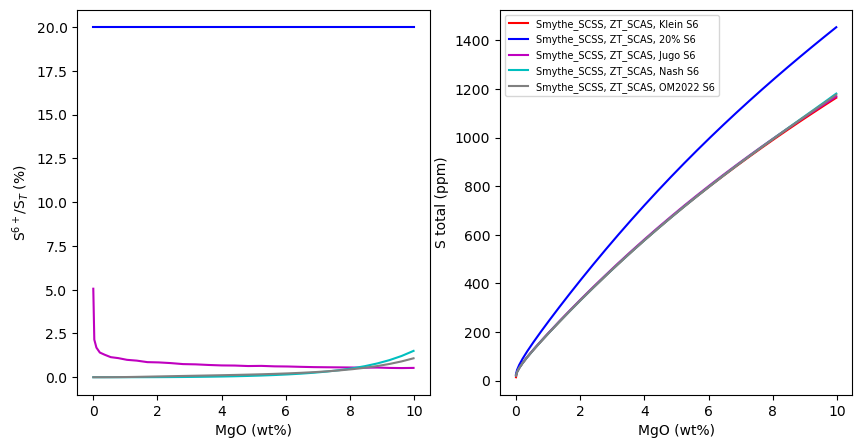

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
# Using fixed S6
ax1.plot(df_out['MgO_Liq'],
    100*df_ST_FixedS6['S6St_Liq'],
         '-b', label='Smythe_SCSS, ZT_SCAS, 20% S6')
# using Jugo
ax1.plot(df_out['MgO_Liq'],
    100*df_ST_Jugo['S6St_Liq'],
    '-m', label='Smythe_SCSS, ZT_SCAS, Jugo S6')
# Using Nash
ax1.plot(df_out['MgO_Liq'],
    100*df_ST_Nash['S6St_Liq'],
    '-c', label='Smythe_SCSS, ZT_SCAS, Nash S6')  
# Using ONeill and Mavrogenes (2022)
ax1.plot(df_out['MgO_Liq'],
    100*df_ST_OM2022['S6St_Liq'],
    '-', color='grey', label='Smythe_SCSS, ZT_SCAS, OM2022 S6') 


# Using Kleinsasser transition
ax2.plot(df_out['MgO_Liq'], df_ST_Klein['Total_S'],
         '-r', label='Smythe_SCSS, ZT_SCAS, Klein S6')
# Using fixed S6
ax2.plot(df_out['MgO_Liq'],
    df_ST_FixedS6['Total_S'],
         '-b', label='Smythe_SCSS, ZT_SCAS, 20% S6')
# using Jugo
ax2.plot(df_out['MgO_Liq'],
    df_ST_Jugo['Total_S'],
    '-m', label='Smythe_SCSS, ZT_SCAS, Jugo S6')
# Using Nash
ax2.plot(df_out['MgO_Liq'],
    df_ST_Nash['Total_S'],
    '-c', label='Smythe_SCSS, ZT_SCAS, Nash S6') 
# Using ONeill Mavrogenes (2022)
ax2.plot(df_out['MgO_Liq'],
    df_ST_OM2022['Total_S'],
    '-', color='grey', label='Smythe_SCSS, ZT_SCAS, OM2022 S6') 

ax1.set_ylabel('S$^{6+}$/S$_T$ (%)')
ax1.set_xlabel('MgO (wt%)')
ax2.set_ylabel('S total (ppm)')
ax2.set_xlabel('MgO (wt%)')
ax2.legend(fontsize=7)